In [2]:
import mxnet as mx 
from symbol import get_resnet_model
from symbol import YOLO_loss
from data_ulti import get_iterator
import matplotlib.pyplot as plt 
import cv2

In [3]:
sym = get_resnet_model('cat_detect_full_scale', 588)
_, args_params, aux_params = mx.model.load_checkpoint('cat_detect_full_scale', 588)

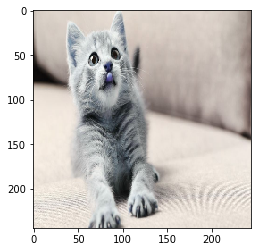

(244, 244, 3)
(3, 244, 244)


In [4]:
mod = mx.mod.Module(symbol=sym, context=mx.gpu(0))

#load data



img1 = cv2.imread("cat.jpg")

img1 = cv2.resize(img1,(244,244))
data = mx.nd.array(img1,ctx=mx.gpu(0))
plt.imshow(img1)
plt.show()
print(img1.shape)
data = mx.nd.transpose(data, axes=(2,0,1))
print(data.shape)

In [5]:
name = 'cat_test'
sizet = 224

record = mx.recordio.MXIndexedRecordIO(name+".idx",
                                           name+".rec", 'w')

#imgname = imglist[i]
img = img1
header = mx.recordio.IRHeader(0, 1, 0, 0)
s = mx.recordio.pack_img(header, img, quality=100, img_fmt='.jpg')
record.write_idx(1,s)
print ("JPG to rec is Done")
record.close()

JPG to rec is Done


In [6]:
# read the rec file
data = mx.io.ImageRecordIter(path_imgrec='cat_test.rec',
                             data_shape=(3,224,224),
                             
                             batch_size=1,)

In [7]:
type(data)

mxnet.io.MXDataIter

In [8]:
out = mod.predict(eval_data = data)


AssertionError: 